<a href="https://colab.research.google.com/github/mohameddhameem/TensorflowCertification/blob/main/ExamPrep/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Problem Statement 1
❏ UseTensorFlow2.x.

❏ Build, compile and train machine learning (ML) models using TensorFlow.

❏ Preprocess data to get it ready for use in a model.

❏ Use models to predict results.

❏ Build sequential models with multiple layers.

❏ Build and train models for binary classification.

❏ Build and train models for multi-class categorization.

❏ Plot loss and accuracy of a trained model.

❏ Identify strategies to prevent overfitting, including augmentation and dropout.

❏ Use pre trained models(transfer learning).

❏ Extract features from pre-trained models.

❏ Ensure that that inputs to a model are in the correct shape.

❏ Ensure that you can match test data to the input shape of a neural network.

❏ Ensure you can match outputdata of a neural network to specified input shape for test data. 

❏ Understand batch loading of data.

❏ Use callbacks to trigger the end of training cycles.

❏ Use datasets from different sources.

❏ Use datasets in different formats, including json and csv. 

❏ Use datasets from tf.data.datasets.

## Would like to addrss one or more above problems in a single model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


* Binary Classification Cat vs Dog
* Plot Loss and accuracy of a trained model
* Prevent overfitting (with dropout)

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cat vs Dog

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

--2021-06-02 11:53:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 64.233.167.128, 64.233.166.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   203MB/s    in 0.3s    

2021-06-02 11:53:46 (203 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
# We already have the images properly placed in train / validation folder.
# Lets build the model. Consider the incoming images would be of 150x150

# 1. First Image generator
train_image_gen = ImageDataGenerator(rescale=1. / 255)
val_image_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_image_gen.flow_from_directory(train_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode='binary')

validation_generator = val_image_gen.flow_from_directory(validation_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
#Lets build our simple model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
100/100 - 13s - loss: 2.0435 - accuracy: 0.5270 - val_loss: 0.7094 - val_accuracy: 0.5590
Epoch 2/100
100/100 - 12s - loss: 0.9052 - accuracy: 0.5770 - val_loss: 0.6676 - val_accuracy: 0.5660
Epoch 3/100
100/100 - 12s - loss: 0.6896 - accuracy: 0.6190 - val_loss: 0.7600 - val_accuracy: 0.5770
Epoch 4/100
100/100 - 12s - loss: 0.5701 - accuracy: 0.6875 - val_loss: 0.6839 - val_accuracy: 0.5850
Epoch 5/100
100/100 - 12s - loss: 0.4647 - accuracy: 0.7620 - val_loss: 0.6422 - val_accuracy: 0.6630
Epoch 6/100
100/100 - 12s - loss: 0.3811 - accuracy: 0.8365 - val_loss: 0.5737 - val_accuracy: 0.6890
Epoch 7/100
100/100 - 12s - loss: 0.3133 - accuracy: 0.8760 - val_loss: 0.7560 - val_accuracy: 0.5870
Epoch 8/100
100/100 - 12s - loss: 0.2553 - accuracy: 0.9155 - val_loss: 0.6504 - val_accuracy: 0.6870
Epoch 9/100
100/100 - 12s - loss: 0.1966 - accuracy: 0.9350 - val_loss: 0.6228 - val_accuracy: 0.7120
Epoch 10/100
100/100 - 12s - loss: 0.1557 - accuracy: 0.9610 - val_loss: 0.6979 - 

# Build and train models for multi-class categorization.

In [9]:
import tensorflow_datasets as tfd

#For multi class classification lets use MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [24]:
EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
VALIDATION_SPLIT = 0.2
RESHAPED = 784

In [16]:
# we will convert the target variable as categorical. 
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [18]:
#Lets create a simple DNN to play around . Later we can try with CNN also
#Lets reshape the input to 784
X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
#Normalize the input within [0, 1]
X_train /= 255
X_test /= 255

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [36]:
# we will use Sequential model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(RESHAPED, input_shape=(RESHAPED,), activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(NB_CLASSES, activation='softmax')
])
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 1,022,490
Trainable params: 1,022,490
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train,y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCH,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT,
          callbacks=[callbacks])

Epoch 1/200
375/375 [==============================] - 2s 5ms/step - loss: 1.2125 - accuracy: 0.7367 - val_loss: 0.5827 - val_accuracy: 0.8690
Epoch 2/200
375/375 [==============================] - 2s 5ms/step - loss: 0.4993 - accuracy: 0.8757 - val_loss: 0.3949 - val_accuracy: 0.8973
Epoch 3/200
375/375 [==============================] - 2s 5ms/step - loss: 0.3872 - accuracy: 0.8948 - val_loss: 0.3333 - val_accuracy: 0.9107
Epoch 4/200
375/375 [==============================] - 2s 5ms/step - loss: 0.3403 - accuracy: 0.9060 - val_loss: 0.3031 - val_accuracy: 0.9168
Epoch 5/200
375/375 [==============================] - 2s 5ms/step - loss: 0.3112 - accuracy: 0.9138 - val_loss: 0.2845 - val_accuracy: 0.9193
Epoch 6/200
375/375 [==============================] - 2s 5ms/step - loss: 0.2902 - accuracy: 0.9191 - val_loss: 0.2664 - val_accuracy: 0.9249
Epoch 7/200
375/375 [==============================] - 2s 5ms/step - loss: 0.2736 - accuracy: 0.9239 - val_loss: 0.2547 - val_accuracy: 0.9292

In [38]:
#Lets evaluate the model with test set
test_loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1852 - accuracy: 0.9475


Text(0.5, 1.0, 'Training and validation loss')

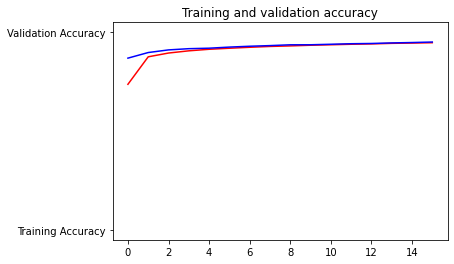

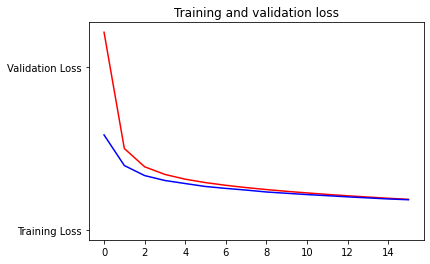

In [39]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')